In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
import statsmodels.api as sm

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [3]:
# Import File
file = 'bar_x_sales_export.csv'

In [4]:
def import_parse(file):

    data = pd.read_csv(file, index_col = 'date', parse_dates=True)
    df = pd.DataFrame(data)
    
    # Rename Column to 'sales'
    df = df.rename(columns={df.columns[0]: 'sales'})
    
    # Drop NaN
    #df = df.query('sales > 0').copy()
    df.dropna(inplace=True)
    
    print(f'"{file}" has been imported + parsed. The file has {len(df)} rows.')
    return df

df = import_parse(file);

"bar_x_sales_export.csv" has been imported + parsed. The file has 890 rows.


In [5]:
df.isnull().sum()

sales    0
dtype: int64

In [6]:
# Review File Import
df.head()
df.tail()

,sales
date,
2017-01-02,427.01
2017-01-03,1920.37
2017-01-04,439.41
2017-01-05,946.57
2017-01-06,3053.26


,sales
date,
2019-06-07,0.0
2019-06-08,0.0
2019-06-09,0.0
2019-06-10,0.0
2019-06-11,0.0


In [7]:
# Analysis Dates
start_date = '2017-01-01' # Start Date Inclusive
end_date = '2019-06-01' # End Date Exclusive

In [8]:
def filter_df(df, start_date, end_date):
    
    return df[(df.index > start_date) & (df.index < end_date)]
    
dfx = filter_df(df, start_date, end_date)

In [9]:
def daily_average_matrix_ann(df):
    
    matrix = df.groupby([df.index.dayofweek, df.index.month, df.index.year]).agg({'sales': 'mean'})
    matrix = matrix.rename_axis(['day', 'month', 'year'])
    return matrix.unstack(level=1)

daily_average_matrix_ann(dfx)

sales                                                 \
month            1           2          3          4            5    
day year                                                             
0   2017   516.3860   647.48250  1183.9425   491.2050   543.816000   
    2018   398.2020   407.79750  1252.3050   313.9940   475.595000   
    2019   449.1125   381.10750   625.6675   390.3160   440.072500   
1   2017   878.5540   688.02000   819.7400   780.1650   727.966000   
    2018   808.3400  1208.02000   610.0475   775.2675   759.864000   
    2019   613.3100   580.39750   686.0950   934.6300   815.617500   
2   2017   829.3400  1149.60250  1090.1660   858.7200   955.394000   
    2018   725.4540  1342.47750   717.5500   995.0500   776.454000   
    2019   735.0040   649.08750  1626.9850  1120.8225   716.862000   
3   2017  1355.0125  1357.96000   908.7360  1166.2575  1293.222500   
    2018  1183.1725  1066.41475  1345.5960  1346.2375  1545.610505   
    2019  1157.4340  1268.69000  1112.1200  1728.0250  1403.620000   
4   2017  2827.9725  3204.24750  3060.9860  2949.0750  3289.650000   
    2018  3065.4600  4349.03750  4042.1680  4316.6850  3706.467500   
    2019  3487.0125  4170.30000  3691.6700  4244.4200  3902.230000   
5   2017  2920.9700  3991.26250  3673.6275  3290.3240  3079.322500   
    2018  4337.5900  4444.53750  4625.7580  4243.9700  3694.255000   
    2019  3573.1525  4498.55500  4450.1420  4623.2500  4610.585000   
6   2017  1074.6900  1550.90000   643.9475   761.9100  1310.082500   
    2018   678.0800  1070.21750   705.7325   744.2500  1853.280000   
    2019   743.0425   747.23250   799.1100   662.0525  1955.124000   

                                                                           \
month              6            7            8            9            10   
day year                                                                    
0   2017   555.365000  1212.406000   533.020000   418.412500   529.060000   
    2018  1573.685511   376.968794   690.178243   455.241160   902.620590   
    2019          NaN          NaN          NaN          NaN          NaN   
1   2017   729.102500   691.960000   779.938000   496.820000  1074.068000   
    2018  1676.605227  1065.680822   800.896800   715.204696   737.921757   
    2019          NaN          NaN          NaN          NaN          NaN   
2   2017   830.735000   637.622500   665.670000   645.045000   876.327500   
    2018  1161.861426  1137.068591   971.995906  1286.541929  1667.758492   
    2019          NaN          NaN          NaN          NaN          NaN   
3   2017  1025.390000  1074.647500  1182.468000  1332.415000   762.650000   
    2018  1236.101679  1115.645611  1361.021963  1242.712945  1014.373708   
    2019          NaN          NaN          NaN          NaN          NaN   
4   2017  2912.632000  2128.480000  3182.207500  3674.406000  3193.820000   
    2018  4080.084032  3189.473347  3908.243814  4170.388811  3877.366825   
    2019          NaN          NaN          NaN          NaN          NaN   
5   2017  3354.785000  2944.338000  2830.012500  3136.190000  3370.617500   
    2018  4341.739711  3875.997336  4075.045577  3768.836186  4195.143800   
    2019          NaN          NaN          NaN          NaN          NaN   
6   2017   675.692500   605.934000   533.185000   941.972500   662.100000   
    2018   652.400316   892.488110   726.787170  1332.109718   418.156200   
    2019          NaN          NaN          NaN          NaN          NaN   

                                    
month              11           12  
day year                            
0   2017   735.852500   496.392500  
    2018  1154.696929  1207.864237  
    2019          NaN          NaN  
1   2017   631.415000   585.697500  
    2018   903.176949   605.239133  
    2019          NaN          NaN  
2   2017  1548.482000   820.735000  
    2018  1003.392882   857.146338  
    2019          NaN          NaN  
3   2017  1256.718000  1510.247500  
   

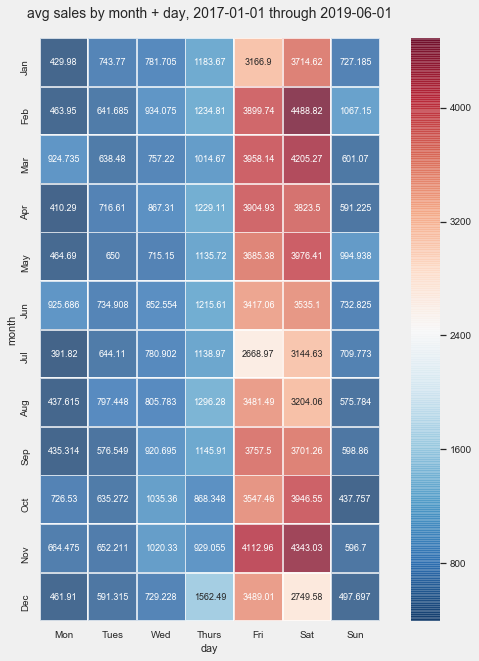

In [10]:
def sales_heatmap(df, start_date, end_date):
    
    temp_df = df[(df.index > start_date) & (df.index < end_date)]
    
    matrix = temp_df.groupby([temp_df.index.month, temp_df.index.dayofweek]).agg({'sales': 'median'})
    matrix = matrix.rename_axis(['month', 'day'])
    temp_df = matrix.unstack(level=1)

    plt.figure(figsize=(10,10))
    sns.set(font_scale=0.9)
    sns.set_style('whitegrid')
    sns.heatmap(temp_df, square=True, linewidths=0.75, annot=True, annot_kws={"size": 9}, fmt='g', 
                cmap='RdBu_r', alpha=0.75, yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
    plt.ylabel('month')
    plt.xlabel('day')
    plt.title(f'avg sales by month + day, {start_date} through {end_date}',size=14, pad=20)
    plt.show();
    
sales_heatmap(dfx, '2017-01-01', end_date)

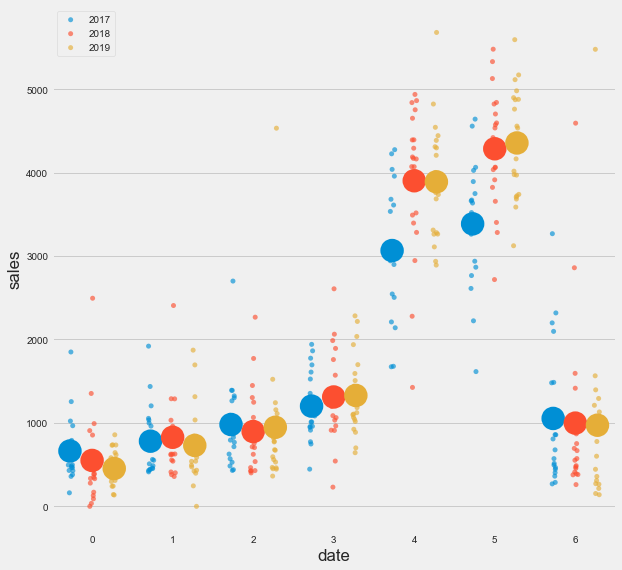

In [11]:
# Year over Year
plt.style.use('fivethirtyeight')
df_ytd = dfx[dfx.index.month < 6] # Analyzing Months 1 through 5

plt.figure(figsize=(9,9))

sns.stripplot(x=df_ytd.index.dayofweek,
               y=df_ytd.sales,
               hue=df_ytd.index.year,
               data=df_ytd,
               dodge=0.35,
               alpha=0.65
                );

sns.pointplot(x=df_ytd.index.dayofweek,
               y=df_ytd.sales,
               hue=df_ytd.index.year,
               data=df_ytd,
               dodge=0.55,
               alpha=0.75,
               join=False,
               ci=None
                );

plt.legend(['2017', '2018', '2019']);

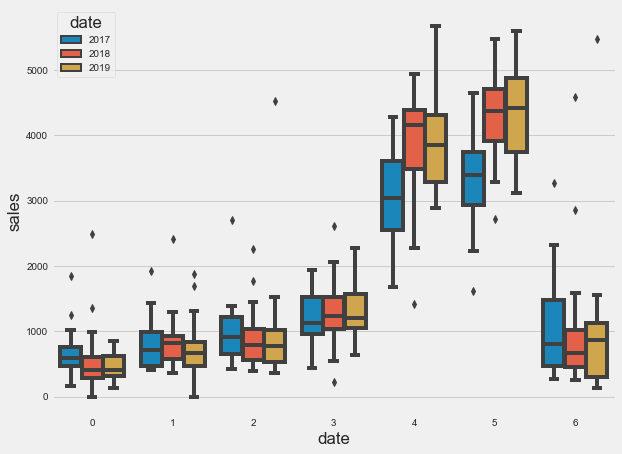

In [12]:
plt.figure(figsize=(9,7))
sns.boxplot(x=df_ytd.index.dayofweek,
               y=df_ytd.sales,
               hue=df_ytd.index.year,
               data=df_ytd
                );

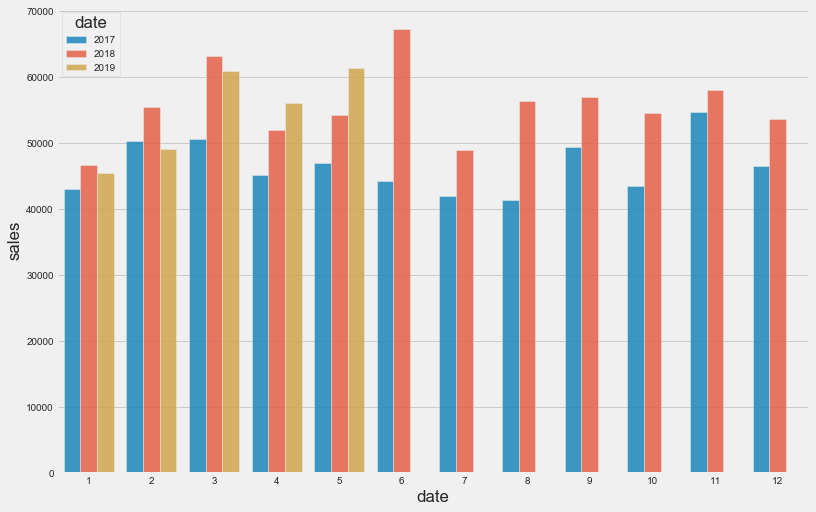

In [13]:
df_monthly = dfx.resample('M').agg({'sales': 'sum'})
plt.figure(figsize=(12,8))

sns.barplot(x=df_monthly.index.month, y=df_monthly.sales, hue=df_monthly.index.year, data=df_monthly, alpha=0.85);

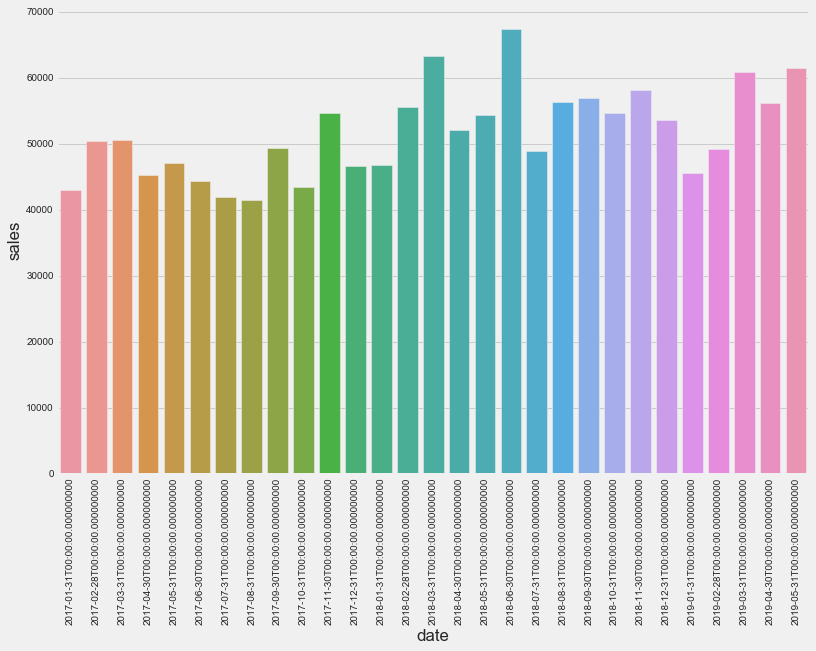

In [14]:
plt.style.use('fivethirtyeight')
df_monthly = dfx.resample('M').agg({'sales': 'sum'})
plt.figure(figsize=(12,8))

sns.barplot(x=df_monthly.index, y=df_monthly.sales, data=df_monthly)
plt.xticks(rotation='vertical');

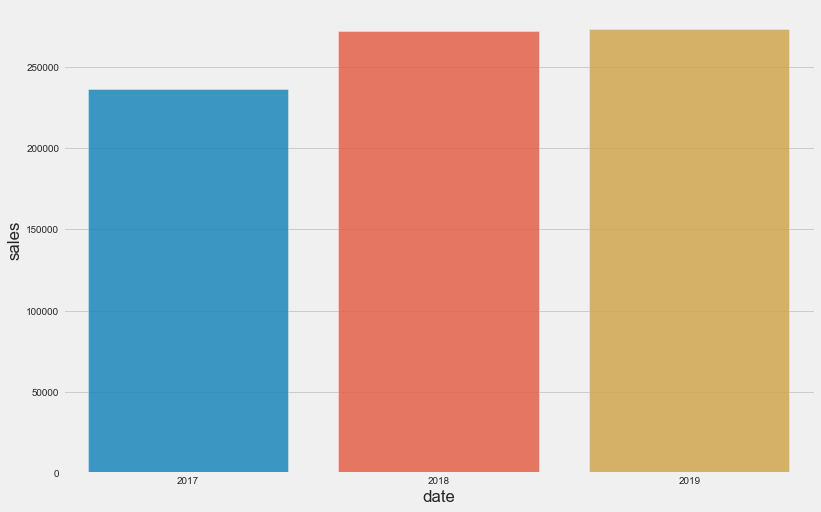

In [17]:
df_annual = df_ytd.resample('Y').agg({'sales': 'sum'})
plt.figure(figsize=(12,8))

sns.barplot(x=df_annual.index.year, y=df_annual.sales, data=df_annual, alpha = 0.85);

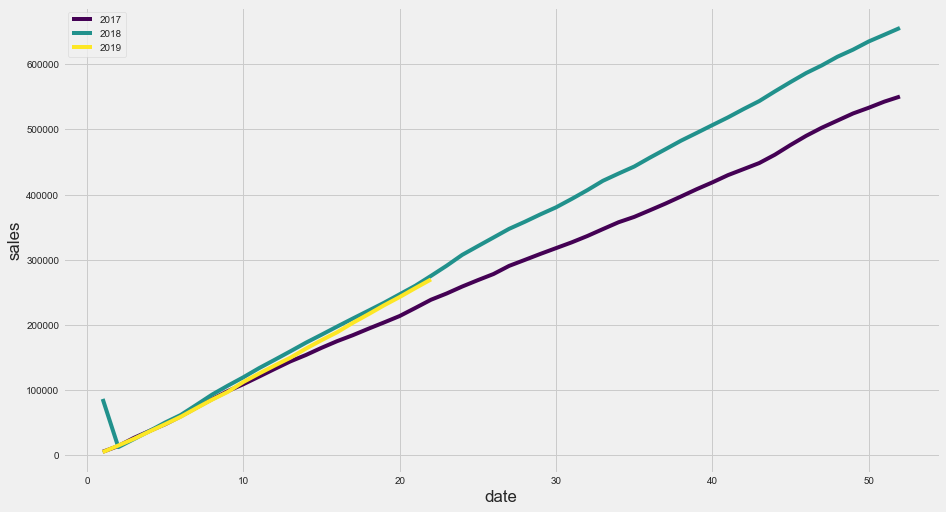

In [18]:
df_cumulative = dfx.resample('Y').agg({'sales': 'cumsum'})

plt.figure(figsize=(14, 8))
sns.lineplot(x=df_cumulative.index.week, y=df_cumulative.sales, hue=df_cumulative.index.year, data=df_cumulative, ci=False, palette='viridis')
plt.legend(['2017', '2018', '2019']);

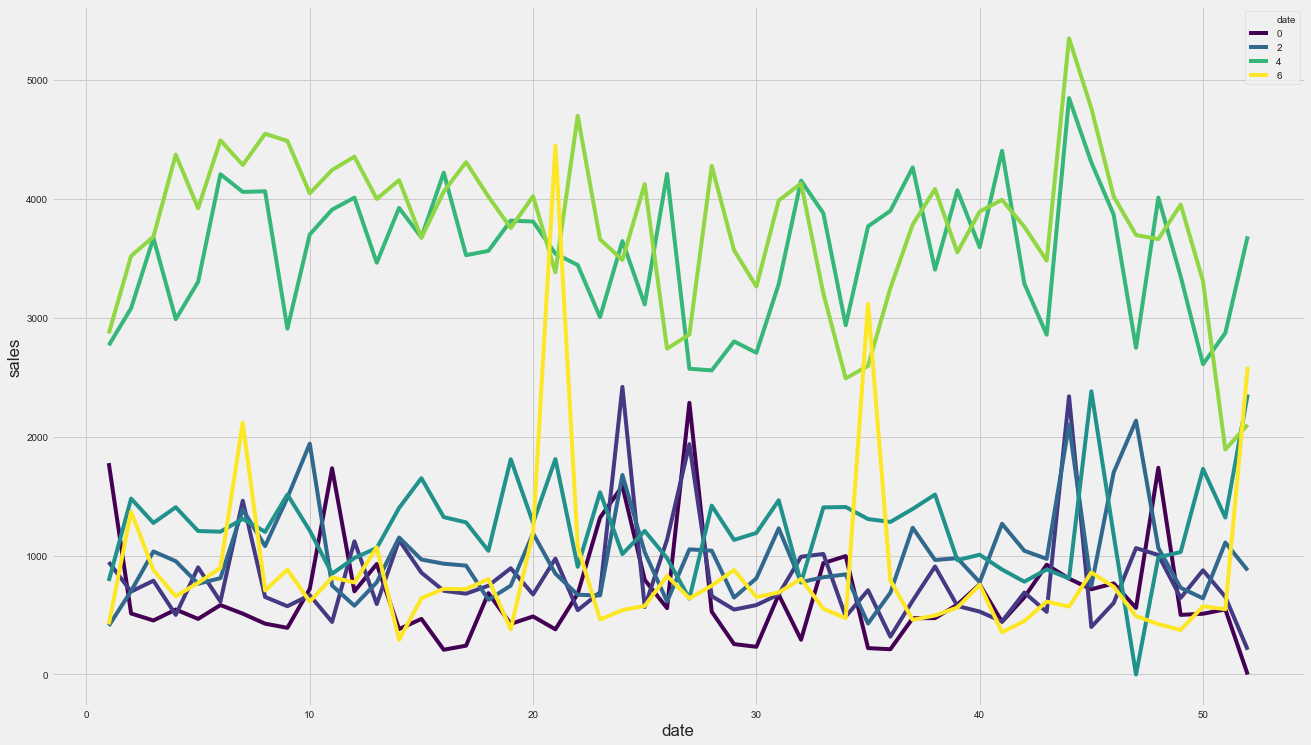

In [19]:
plt.figure(figsize=(20, 12))
sns.lineplot(x=dfx.index.week, y=dfx.sales, hue=dfx.index.dayofweek, data=dfx, ci=False, palette='viridis');

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


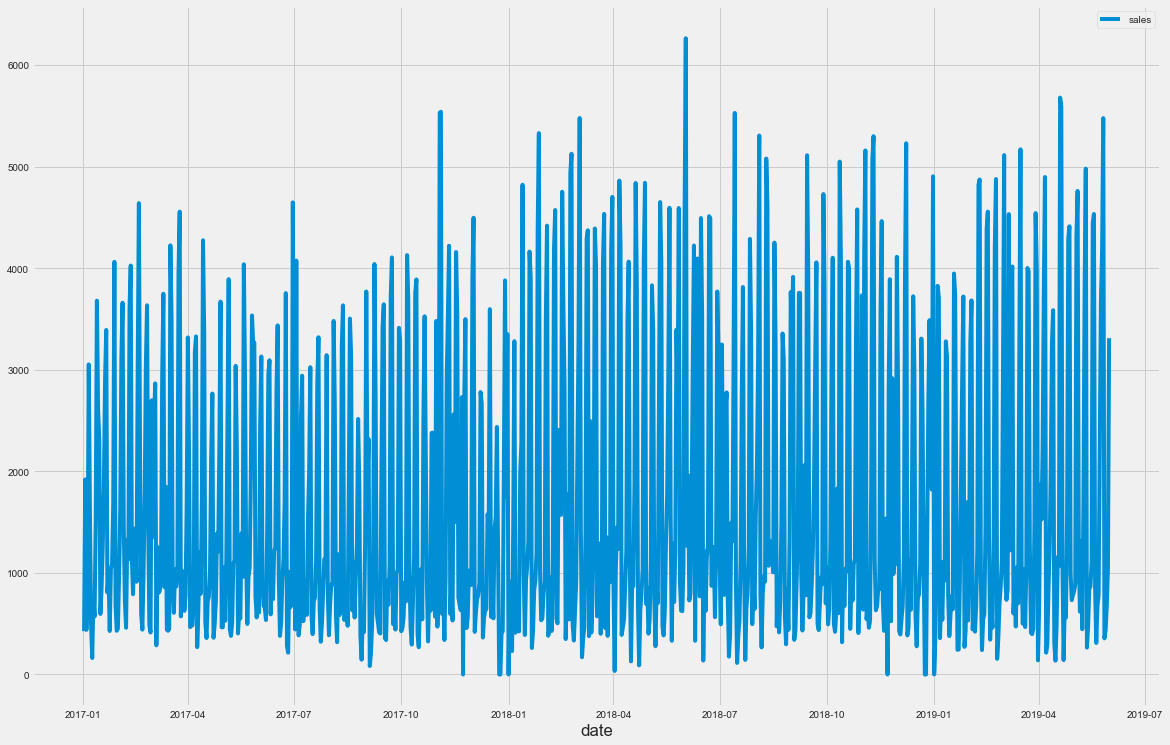

In [20]:
dfx1 = dfx
plt.figure(figsize=(18,12))

sns.lineplot(data=dfx1);

In [21]:
dfx = dfx.asfreq(freq='d')

In [22]:
dfx = dfx.fillna(value=0)

In [ ]:
deco = sm.tsa.seasonal_decompose(dfx, model='additive')

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20,10))

deco.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')

deco.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')

deco.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

deco.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual');

In [ ]:
rolling_mean = dfx.rolling(window=90, min_periods=30).mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=rolling_mean);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(df, Sales):
    
    rolmean = dfx['sales'].rolling(window = 30, center=False).mean()
    rolstd = dfx['sales'].rolling(window = 30, center=False).std()
    
    plt.figure(figsize=(20, 12))
    
    orig = plt.plot(df['sales'],
                    color='blue',
                    label = 'Original')
    
    mean = plt.plot(rolmean,
                   color = 'red',
                   label = 'Rolling Mean')
    
    std = plt.plot(rolstd,
                   color = 'black',
                   label = 'Rolling Mean')
    
    plt.legend(loc='best')
    
    dftest = adfuller(dfx['sales'],
                     autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index= ['Test Statistic',
                               'p-value',
                               '# Lags Used',
                               'Num Observations'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df = dfx, Sales='sales')